<a href="https://colab.research.google.com/github/sammy-suyama/PythonBayesianMLBook/blob/main/chapter3/3_1_%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB_%E7%B7%9A%E5%BD%A2%E5%8D%98%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title install packages
!pip install watermark
#!pip install pymc3==3.11.4
!pip install pymc3

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

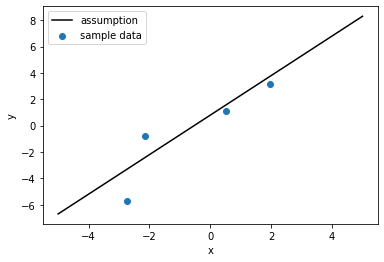

In [ ]:
np.random.seed(123)

# 真のパラメータ
true_w1 = 1.5
true_w2 = 0.8

# サンプルデータ
N = 4
x_data = np.random.uniform(-5, 5, size=N)
y_data = true_w1 * x_data + true_w2  + np.random.normal(0., 1., size=N)

# データプロット
x_plot_data = np.linspace(-5, 5, 100)
y_plot_data = true_w1 * x_plot_data + true_w2 

plt.scatter(x=x_data, y=y_data, marker='o', label='sample data')
plt.plot(x_plot_data, y_plot_data, color='black', label='assumption')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [ ]:
import pymc3 as pm

In [ ]:
# モデルの定義
with pm.Model() as model:

    # 説明変数
    x = pm.Data("x", x_data)

    # 推論パラメータの事前分布
    w1 = pm.Normal('w1', mu=0.0, sigma=10.0)
    w2 = pm.Normal('w2', mu=0.0, sigma=10.0)

    # 尤度関数
    y = pm.Normal('y', mu=w1*x+w2, sigma=1.0, observed=y_data)

In [ ]:
with model:
    # MCMCによる推論
    trace = pm.sample(draws=3000, tune=1000, chains=3, random_seed=1, \
                      return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (3 chains in 1 job)
NUTS: [w2, w1]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 8 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa926eab250>,
      dtype=object)

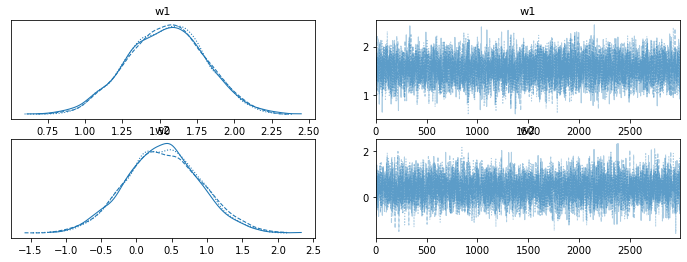

In [ ]:
az.plot_trace(trace);

In [ ]:
for var_info in az.rhat(trace).values():
  print(var_info.name, var_info.values.round(3), sep=' ')

w1 1.001
w2 1.001


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa925aa6550>,
      dtype=object)

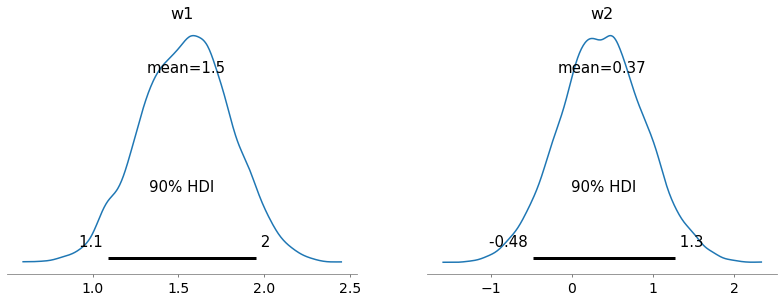

In [ ]:
az.plot_posterior(trace, hdi_prob=0.9);

In [ ]:
# 検証用データ
x_new = np.linspace(-5, 5, 10)

with model:
    # 検証用データを推論したモデルに入力
    pm.set_data({"x": x_new})

    # 予測分布からサンプリング
    pred = pm.sample_posterior_predictive(trace, samples=1000, random_seed=1) 

y_pred_samples = pred['y']

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


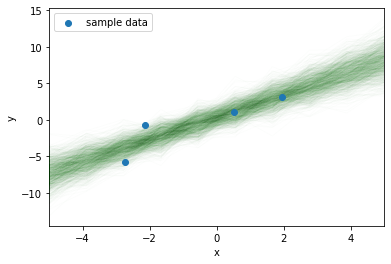

In [ ]:
# 予測分布からのサンプルをプロット
for i in range(1000):
    plt.plot(x_new, y_pred_samples[i,:], lw=1, alpha=0.01, color='g', zorder=i)

plt.scatter(x=x_data, y=y_data, marker='o', label='sample data', zorder=i+2)
plt.xlabel('x');plt.ylabel('y');plt.xlim(-5,5)
plt.legend();

In [ ]:
%load_ext watermark
%watermark --iversions

matplotlib: 3.2.2
numpy     : 1.21.6
IPython   : 5.5.0
scipy     : 1.4.1
seaborn   : 0.11.2
pandas    : 1.3.5
pymc3     : 3.11.4
arviz     : 0.12.1

